# LAB 1 - NLP - Solutions
Start by running the cell below to install the required packages

In [ ]:
!pip install numpy gensim pandas matplotlib scikit-learn

# 1. Tokenizers

### <ins>BACKGROUND</ins> 

Tokenizers split a text into a sequence of tokens. There are different ways of doing this but an intuitive first step towards a good tokenizer is one that simply splits a text into it's constituent words. You will first construct such a tokenizer and then build a better one.

### <ins>EXERCISE 1</ins> 

#### TODO: 
- Implement a simple tokenizer that can tokenize by splitting a text on whitespaces. 
- Test it on a sample text

In [2]:
def simpletokenizer(text):
    "Split the text on whitespaces"
    tokens = text.split(" ")
    return tokens

### Test your tokenizer on this text

Now we would like to test our function `simpletokenizer` on some text. Our sample text consists of the first three paragraphs from the book [Bannlyst by Selma Lagerlöf](http://runeberg.org/bannlyst/0003.html).

Run the cell below!

In [ ]:
text = """På Grimön i den västra skärgården bodde för några år sedan en man och en hustru, som voro varandra mycket olika. 
Mannen, som var omkring femton år äldre än hustrun, hade aldrig varit annat än ful, trög och senfärdig och hade inte blivit bättre på gamla dar, hustrun åter hade alltid varit nätt och lätt, och hennes lilla vackra ansikte hade bibehållit sig så väl, att hon såg närapå lika bra ut vid femtio som vid tjugu. 
Dessa två makar sutto en vacker söndagskväll på en stor stenhäll, som stack upp ur marken alldeles utanför deras hus, och samspråkade i god ro. Mannen, som tyckte om att höra sin egen röst och lade sina ord väl, utbredde sig för hustrun över en artikel, som han just nyss hade läst i en tidning.
Hustrun hörde på honom med inte alltför spänd uppmärksamhet. Ack, den Joel, den Joel, tänkte hon, att han kan få ut så mycken lärdom ur ett sådant där tidningsblad! Han har verkligen ett märkvärdigt gott huvud. Det är bara synd, att han inte är i stånd att göra något bruk av det för sin och min räkning, utan bara för andras."""


simpletokenizer(text)

### What do you see?
You should see a python list of words. If you look closely, you'll see there are some items in the list that aren't just one word. There are also special characters in some that we probably want to remove.

#### Questions

- What special characters are left, that we would like to remove?
- What does `\n` mean?

Tip: Remember that you can search the web if you don't know the answer!

### Next steps

We now have two options to improve our tokenizer function:
- **A**. create a function `better_tokenizer` that handles the special characters and other special cases that you find
- **B**. use regex to create a function `regextokenizer`

**Option A** is a good exercise for practicing your skills with strings, lists and loops.

**Option B** is good for practicing regex. Even if you find it intimidating, at least try to read one of the linked tutorials to get a feeling for what it can do. There is always more things to learn, this is just one of many!

### <ins>EXERCISE 2A - Strings, lists, and loops! </ins>

We can clean up the word list by looping through it and remove punctuation, new line characters and other things we have found that should be removed.

#### TODO: 
- Implement a tokenizer that tokenizes and removes all special characters
    - How do you handle new line characters?
    - How do you handle multiple words in one string?
    - How do you handle punctuation?
    - Tip: go through [this list of string methods](https://www.w3schools.com/python/python_ref_string.asp) you can apply to all strings to see if any of them look useful
    - Tip: check out Python's [list methods](https://www.w3schools.com/python/python_ref_list.asp) to get clues on how to specify where in a list you want to put new elements
- Run the test (you can find it in a cell further below) to see that it works properly

In [ ]:
def better_tokenizer(text):
    """ This function should return a list of only words, without any special characters. """

    string_list = text.split(" ")

    # write your code here
    # what do you want to do for each string in the string_list?

    tokens = []

    for string in string_list:
        
        if string.startswith("\n"):  # new line character
            string = string[2:]

        # handle multiple words
        new_line_index = string.find("\n")
        if new_line_index != -1:
            left_word = string[:new_line_index]
            right_word = string[new_line_index + 2:]

            single_word = False
        else:
            single_word = True
        
        if single_word:
            string = string.strip(",.!?")  # punctuation
            tokens.append(string)
        else:
            left_word = left_word.strip(",.!?")  # punctuation
            right_word = right_word.strip(",.!?")  # punctuation

            tokens.append(left_word)
            tokens.append(right_word)

    return tokens

In [ ]:
better_tokenizer(text)

### <ins>EXERCISE 2B - Regex </ins>

#### What is regex?

Regex is a very powerful tool to manipulate text in many different ways. 

More technically, regex is a pattern matcher. The Python module `re` contains many functions for regex, and using the `re` module looks like

    re.function(regex, text)

where regex is the regular expression and text the string you want to search for the pattern in. When using regexes in python, it's important to tell python that the regex is a 'raw string' by putting an 'r' before the string like this regex for finding sequences of whitespaces in text:

    r'\s+'

**However!** regex can be confusing. Please do go through one of the tutorials, either the one on RealPython or Regexone. 

Regex is valuable to be aware of, so even if you do not use it here, now you know it exists and is something you can come back to in the future!

#### TODO: 
- Implement a tokenizer that tokenizes and removes all special characters with the python regex module 're'
    - Doc at: https://docs.python.org/3/howto/regex.html
    - Python Docs can be hard to follow, here is a more gentle introduction: https://realpython.com/regex-python/
    - Interactive course on regex: https://regexone.com/
    - Try regular expressions at https://regex101.com/  (make sure to select python in the list to the left)
    - Tip: There are different regexes that will solve the problem
    - Tip: a word can be described as the letters between two word boundaries
    - Tip: chatGPT is not great at regex, it often suggests very complicated solutions that do not give you the result you want
- Run the test (you can find it in a cell further below) to see that it works properly

In [ ]:
import re
def regextokenizer(text):
    """This function should return a list of only words, without any special characters. 
    Fill in your regex pattern in the findall method"""
    
    regex_pattern = r'\b\S+\b' # Write your regex pattern here, e.g. r'[a-z]+'
    
    return re.findall(regex_pattern, text)
    

In [ ]:
regextokenizer(text)

### Test your improved tokenizer!
When you are done with your regextokenizer, run the cell below to check that it works properly

**NOTE** This test can be used for either the regex tokenizer or the "better" tokenizer!

In [8]:
def test_tokenizer(tokens):
    assert isinstance(tokens, list), 'did not receive a list of tokens'
    assert len(tokens) != 0, 'received empty list'
    assert sum(len(x) for x in tokens) != len(tokens), 'Looks like all your tokens are single characters'
    passed = 1
    if any([',' in token for token in tokens]):
        print('There are commas in your tokens. Make sure they are removed')
        passed = 0
    if any(['!' in token for token in tokens]):
        print('There are excalmation points in your tokens. Make sure they are removed')
        passed = 0
    if any(['?' in token for token in tokens]):
        print('There are question marks in your tokens. Make sure they are removed')
        passed = 0
    if any(['.' in token for token in tokens]):
        print('There are periods in your tokens. Make sure they are removed')
        passed = 0
    if any(['\n' in token for token in tokens]):
        print(r'There are newlines(\n) in your tokens. Make sure they are removed')
        passed = 0
    if any([char.isupper() for token in tokens for char in token]):
        print(r'There are upper case letters in your tokens. Make sure they are set to lower')
        passed = 0
    else:
        print('Your tokens have no special characters left!')
    return


# change below to the tokenizer function you want to test
tokens = regextokenizer(text)
# tokens = better_tokenizer(text)

test_tokenizer(tokens)

Your tokens have no special characters left!


# 1. TF-IDF 


### <ins> BACKGROUND </ins>

The TF-IDF or "Term frequency inverse document frequency" is a measure of how important a certain word is to a certain text. It can for example be used in a search engine to find documents/webpages that are relevant to your query.

You can read more about TF-IDF
- https://monkeylearn.com/blog/what-is-tf-idf/
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf

Quick explanation:

Term Frequency (TF) means how common a certain term (word) is in a single document. A document could be anything from a single page of text, to one whole book as in our case below.

Inverse Document Frequency (IDF) means how common a certain term (word) is across many documents (or many books).

In mathematical terms, we can write this in Python pseudo code as:

- TF[word] = nbr_occurances[word] / nbr_words_in_text
- IDF[word] = log10 (nbr_documents / nbr_documents_that_contain_word)
- TF-IDF[word]: TF[word] * IDF[word] 

Note we use the logarithm for IDF, which in practice means we that if a word is very common and can be found in most or even all our documents, then IDF will be close to 0. If the word is uncommon/rare, then IDF will be closer to 1.

#### TODO:

- Read texts by selma lagerlöf by running the cell below

In [ ]:
!git clone https://github.com/NordAxon/NBI-Handelsakademin-ML-Labs

from pathlib import Path

print("Starting to read books...")

selma_dir = Path('/content/NBI-Handelsakademin-ML-Labs/nlp-lab/data/selma_lagerlof')
files = [file for file in selma_dir.iterdir() if file.suffix == '.txt']
texts = {}
for file in files:
    with open(file,'r', encoding="utf8") as f:
        text = f.read()
        texts[file.stem] = text

print('Read books:')
for title in texts.keys():
    print(' ', title)

### <ins> EXERCISE </ins>


You now have a dictionary where the book title maps to the text. Now you have to calculate the Term Frequency (TF) and Inverse Document Frequency (IDF).


#### TODO:
- implement the function term_frequency()
    - You need to standardize and tokenize the text.
    - The function should return a dict like object, with the words of the text as keys, and their frequency in the text as values
    - Tip: You can read more about how to use Counter here: https://realpython.com/python-counter/#getting-started-with-pythons-counter
    - Tip: It is possible to write this function without using Counter, but it may be very slow so it is not recommended

In [12]:
from collections import Counter

def term_frequency(text):
    """Tokenizes text and returns a dictionary like object tf_dict[word].
    
    Example:
        input:
            text = han hade det fint i sitt rum
        output:
            tf_dict = {
                'han': 0.14285714285714285,
                'hade': 0.14285714285714285,
                'det': 0.14285714285714285,
                'fint': 0.14285714285714285,
                'i': 0.14285714285714285,
                'sitt': 0.14285714285714285,
                'rum': 0.14285714285714285}
    """
    # Write your code below. Hint: Use your tokenizer from before 
    text = text.lower()
    word_list = regextokenizer(text)
    tf_dict = Counter(word_list)

    number_of_words = len(word_list)
    for word, word_count in tf_dict.items():
        tf_dict[word] = word_count / number_of_words

    return dict(tf_dict)

In [13]:
text = "han,   hade \n det Fint i   Sitt . rum"
text = text.lower()
word_list = regextokenizer(text)
Counter(word_list)

Counter({'han': 1,
         'hade': 1,
         'det': 1,
         'Fint': 1,
         'i': 1,
         'Sitt': 1,
         'rum': 1})

In [14]:
term_frequency(text)

{'han': 0.14285714285714285,
 'hade': 0.14285714285714285,
 'det': 0.14285714285714285,
 'fint': 0.14285714285714285,
 'i': 0.14285714285714285,
 'sitt': 0.14285714285714285,
 'rum': 0.14285714285714285}

#### Run the cell below to create a master tf for all the books

In [15]:
def term_frequency_all_texts(texts):
    "Returns a nested dictionary where master_tf['title'] returns the term frequency dictionary for the book 'title'"
    master_tf = {}
    for title, text in texts.items():
        master_tf[title] = term_frequency(text)
    
    return master_tf

master_tf = term_frequency_all_texts(texts)

In [ ]:
# check if the structure of our master_tf is what we expect
# before you run this cell, ask yourself what you expect to see
# should it be a list? a dictionary? a dictionary with dictionaries?
master_tf

### Try out your tf 

Access the term frequency of a word in a book with 

    master_tf['title']['word']

If it works correctly, the term frequency of 'nils' in 'nils' should be  0.0003979

In [17]:
master_tf['nils']['nils']
        

0.0003979347689207908

What does it mean to get 'nils' from 'nils'?
- We are asking how common is the word 'nils' in the book 'nils'

### IDF

To create the IDF (Inverse Document Frequency) you need to know in how many documents a certain word exists. The IDF is then calculated as 

    IDF(word) = log10 (nbr_documents / nbr_documents_that_contain_word)

**Note:** nbr_documents is short for number of documents, or "antal dokument" in Swedish.

#### TODO:
- Complete the function `make_inverse_document_frequency()`


In [18]:
from numpy import log10

def make_inverse_document_frequency(master_tf):
    word_in_nbr_docs = {} # vocabulary of words
    number_of_documents = len(master_tf)
    
    # master_tf contains all the words from all the individual documents
    for book_title, tf_dict in master_tf.items():
        
        for word in tf_dict.keys():
        # We add the word to the vocabulary
            try:
                word_in_nbr_docs[word] += 1
            except KeyError:
                word_in_nbr_docs[word] = 1
    
    # word -> idf
    word_to_idf = {}
    
    for word, counts in word_in_nbr_docs.items():
        # Calculate the idf 
        # word_to_idf[word] = None # Insert your code here
        word_to_idf[word] = log10(number_of_documents / counts)
        
    return word_to_idf   

idf = make_inverse_document_frequency(master_tf)

In [ ]:
# check if the structure of our idf is what we expect
# before you run this cell, ask yourself what you expect to see
# should it be a list? a dictionary? a dictionary with dictionaries?
idf

### Try out your IDF

If it works properly, idf['nils'] should be ~0.2553

In [20]:
# idf['ord']
idf["nils"]

0.25527250510330607

### Finally it's time to compute the TF-IDF from our TF and IDF values

We want a nested dictionary so we can look up the TF-IDF for a certain word as `tf_idf[text][word]`

#### TODO:
- implement make_tf_idf()

Hints:
- Recall that `TF-IDF[word] = TF[word] * IDF[word]`
- It should have the same structure as the master_tf object. 
- You can iterate through the object and update the values


In [21]:
from copy import deepcopy

def make_tf_idf(master_tf, idf):
    
    # Use if you want. You need to go through the tfidf and update all the values
    tf_idf = deepcopy(master_tf)
    
    # Fill in your code here  
    for book_title, tf_dict in tf_idf.items():
        for word, term_frequency in tf_dict.items():
            tf_idf[book_title][word] = term_frequency * idf[word]
    
    return tf_idf

tf_idf = make_tf_idf(master_tf, idf)

In [ ]:
# check if the structure of our tf_idf is what we expect
# before you run this cell, ask yourself what you expect to see
# should it be a list? a dictionary? a dictionary with dictionaries?
tf_idf

## Testing your TF-IDF

You now have a TF-IDF table that you can use to get values from different texts. Use it to compare the values of different words between the different texts.


#### TODO:
- Look at some tfidf values. What conclusions can you draw from your results?
    Here's a list of words you can try:
    + nils
    + och
    + värmland
    + troll
    + pojke
- Use the function k_most_specific_words to get a list of the words with the largest tfidf values for the different texts

    


In [23]:
# what book titles do we have?
tf_idf.keys()

dict_keys(['nils', 'bannlyst', 'marbacka', 'gosta', 'osynliga', 'jerusalem', 'kejsaren', 'troll', 'herrgard'])

In [ ]:
# look at specific words
tf_idf[title][word]

In [25]:
tf_idf["nils"]["nils"]

0.0001015818053301155

In [26]:
tf_idf["nils"]["och"]

0.0

In [27]:
tf_idf["gosta"]["nils"]

KeyError: ignored

**NOTE** when asking for `["gosta"]["nils"]` we get KeyError if `tf_idf` is a regular dictionary. If `tf_idf` instead is a Counter object we will get 0. 

In [28]:
tf_idf["gosta"]["värmland"]

6.918704062860637e-05

In [29]:
tf_idf["jerusalem"]["troll"]

1.4155579114445919e-06

In [30]:
tf_idf["troll"]["troll"]

1.1938695150284695e-05

In [31]:
tf_idf["osynliga"]["pojke"]

4.329455983697105e-06

#### TODO:

- Find the words with the highest tfidf values in the texts. Do they make sense?

In [32]:
def k_most_specific_words(title, k):
    c = Counter(tf_idf[title])
    return c.most_common(k)

In [33]:
k_most_specific_words('gosta', 10)

[('gösta', 0.0023065985184732123),
 ('grevinnan', 0.0011532992592366061),
 ('berling', 0.0009610827160305051),
 ('av', 0.0009559100089808574),
 ('kavaljererna', 0.0008750911045961968),
 ('ekeby', 0.0007745309994395594),
 ('marianne', 0.0006525245808838692),
 ('majorskan', 0.0006281022588770182),
 ('över', 0.0004580930370182359),
 ('sintram', 0.0003894914164965731)]

In [34]:
k_most_specific_words("nils", 10)

[('akka', 0.0013795119013176487),
 ('vildgässen', 0.0009805179655209793),
 ('pojken', 0.0008994158754940727),
 ('av', 0.0007911290341401485),
 ('karr', 0.000677739296466162),
 ('gåskarlen', 0.0005560655576276695),
 ('smirre', 0.0005431527695083426),
 ('tummetott', 0.0005287327844771477),
 ('klement', 0.0004229862275817181),
 ('örnen', 0.00041337290422758816)]

## Something to think about

How would you use the concepts of TF, IDF, and TF-IDF to create, for example, a search engine?

# 3. Word embeddings

To become familiar with word embeddings we'll use the gensim library. We'll download pretrained word2vec embeddings trained on google news.

The gensim library provides functions for playing around with the word embeddings such as comparing how similar two words are, listing the most similar words and more

**TIP**: check the lecture slides for a refresher on what embeddings are!

### <ins> EXERCISE </ins>

##### TODO:
- Play around with the different functions and get a feel for how you can query a word
- When you run the below cell it will take 5-10 minutes to download, so here's your chance to take a short break!

In [76]:
import gensim
import gensim.downloader as api
wv = api.load('word2vec-google-news-300') 

[=================================================-] 100.0% 1662.8/1662.8MB downloaded


### How similar are two words

Which companies have the highest pairwise similarity according to the word embeddings: Google, Facebook, Apple and Microsoft? Compare them and see!

Tip: use itertools to construct all of the combinations so you don't have to do it manually

In [80]:
import itertools
companies = ['google', 'facebook', 'microsoft', 'apple']
combinations = None

word1 = 'google'
word2 = 'facebook'

print(f'Similarity between {word1} and {word2} is {wv.similarity(word1,word2)}')

Similarity between google and facebook is 0.5005902647972107


In [81]:
combinations = itertools.product(companies, companies)
for word1, word2 in combinations:
    print(f'Similarity between {word1} and {word2} is {wv.similarity(word1,word2)}')

Similarity between google and google is 1.0
Similarity between google and facebook is 0.5005902647972107
Similarity between google and microsoft is 0.3238288462162018
Similarity between google and apple is 0.22774799168109894
Similarity between facebook and google is 0.5005902647972107
Similarity between facebook and facebook is 1.0
Similarity between facebook and microsoft is 0.16725438833236694
Similarity between facebook and apple is 0.0854484885931015
Similarity between microsoft and google is 0.3238288462162018
Similarity between microsoft and facebook is 0.16725438833236694
Similarity between microsoft and microsoft is 1.0
Similarity between microsoft and apple is 0.23841595649719238
Similarity between apple and google is 0.22774799168109894
Similarity between apple and facebook is 0.0854484885931015
Similarity between apple and microsoft is 0.23841595649719238
Similarity between apple and apple is 1.0


### List the most similar words

We can query the most similar words to a certain word. Do you think they are reasonable?

In [82]:
word = 'google'
wv.similar_by_word(word, topn=10)

[('google.com', 0.6711485981941223),
 ('google_yahoo', 0.6488178968429565),
 ('wikipedia', 0.643608033657074),
 ('www.google.com', 0.6258559226989746),
 ('googled', 0.6166064143180847),
 ('googling', 0.6086059212684631),
 ('slashdot', 0.5964587330818176),
 ('lifehacker', 0.5948858857154846),
 ('gizmodo', 0.5884420275688171),
 ('inurl', 0.5882638692855835)]

In [83]:
word = "apple"
wv.similar_by_word(word, topn=10)

[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302295327186584),
 ('pears', 0.613396167755127),
 ('strawberry', 0.6058260798454285),
 ('peach', 0.6025872826576233),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935863852500916),
 ('blueberry', 0.5866668224334717)]

### Similar to X like Y to Z

We can query that a word should be positively similar to certain words, but not similar to other words. 

We can use this to query an answer to the following question:
"A king is to a man what a woman is to a ..."

Can you find other examples where a word should be similar to certain words but not to other to find the answer you're looking for?

In [84]:
wv.most_similar(positive=["man", "queen"], negative=["king"], topn=1)

[('woman', 0.7609435319900513)]

In [92]:
wv.most_similar(positive=["man", "queen"], negative=["king"], topn=2)

[('woman', 0.7609435319900513), ('girl', 0.6139994263648987)]

In [90]:
wv.most_similar(positive=["mouse", "banana"], negative=["cheese"], topn=1)

[('monkeys', 0.4152124226093292)]

In [91]:
wv.most_similar(positive=["mouse", "banana"], negative=["cheese"], topn=2)

[('monkeys', 0.4152124226093292), ('rhinoceros_beetle', 0.40751710534095764)]

### You can also try to use basic linear math operators to construct a vector and check what word it is closest to

In [85]:
new_word = wv['tiger'] - wv['cat'] + wv['dog']
wv.most_similar(positive=[new_word], topn=5)

[('tiger', 0.8426186442375183),
 ('tigers', 0.6714946031570435),
 ('dog', 0.574916660785675),
 ('elephants', 0.5681688785552979),
 ('elephant', 0.5566478371620178)]

### Similar to X but not Y

Some words are ambiguous - Apple can be both a tech company and a fruit. What if you want to find similar words to just the fruit? Or just the company? With the 'negative' argument you can specify a word you don't want it to be similar to.

Can you find other examples of ambiguous words?

In [93]:
wv.most_similar(positive=["apple"], negative=["fruit", 'company'], topn=10)

[('YOUNG_BLOOD', 0.31266674399375916),
 ('STAR_GAZING', 0.2859337627887726),
 ('bess', 0.2804725468158722),
 ('ulous', 0.28033408522605896),
 ('PATRICK_KANE', 0.2795514464378357),
 ('By_DOUG_HAIDET', 0.2792541980743408),
 ('martin_luther_king', 0.27754443883895874),
 ('harper', 0.2770758867263794),
 ('HOLDING_COURT', 0.27680718898773193),
 ('BANG_BANG_BANG', 0.2753763794898987)]

In [94]:
wv.most_similar(positive=["apple"], negative=['company'], topn=10)

[('apples', 0.4919757843017578),
 ('cherries', 0.46362555027008057),
 ('pear', 0.4579611122608185),
 ('fruit', 0.45654964447021484),
 ('pears', 0.44098925590515137),
 ('mango', 0.4378015100955963),
 ('peach', 0.43221598863601685),
 ('plums', 0.4271455407142639),
 ('pippin', 0.41679033637046814),
 ('scrumping', 0.41541150212287903)]

In [95]:
wv.most_similar(positive=["apple"], negative=['fruit'], topn=10)

[('Apple', 0.33312755823135376),
 ('Appleâ_€_™', 0.3215164244174957),
 ('Ipod', 0.31791260838508606),
 ('designer_Jonathan_Ive', 0.31394994258880615),
 ('ipod', 0.30566027760505676),
 ('ipod_nano', 0.30507150292396545),
 ('ipod_touch', 0.30397385358810425),
 ('i_Pod', 0.2960202395915985),
 ('asp', 0.2939453721046448),
 ('iPod', 0.2934533655643463)]

### Find the odd one out

In [96]:
words = "apple pear fruit bear " # Separate the words by a space
print(wv.doesnt_match(words.split()))

bear


In [115]:
words = "bumblebee tarantula wasp ant"
print(wv.doesnt_match(words.split()))

tarantula


## Plot embeddings

The embeddings we've used have the dimension 300, i.e. every word is represented by 300 values. In a mathematical sense, they exist in an "abstract room" with 300 dimensions. It's in this room that we compare how similar words are by computing distances and angles between words.

Obviously we can't visualise something in 300 dimensions. But there are mathematical tricks for reducing the dimensions that we can use to then plot the points in 2D(or 3D). Here we'll use an algorithm called TSNE to plot words similar to a target word.

### <ins> EXERCISE </ins>

#### TODO:

- Choose a target word and plot the embeddings that are close to it


#### Trivia

In the call to the `TSNE` function below, notice it says `init='pca'`? 

PCA, or Principal Component Analysis, is a form of *unsupervised learning*. Remember what that is from the first lecture?

That's right! Unsupervised learning automagically finds patterns in data. In this case, it can find the most important _two_ dimensions (`n_components` in the TSNE call) that contain the most information out of the full 300 dimensions. 

In [116]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.manifold import TSNE



target_word = "mario" # This will be the center of your embedding space


selected_words = [w[0] for w in wv.most_similar(positive=[target_word], topn=50)] + [target_word]
embeddings = [wv[w] for w in selected_words] + wv[target_word]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

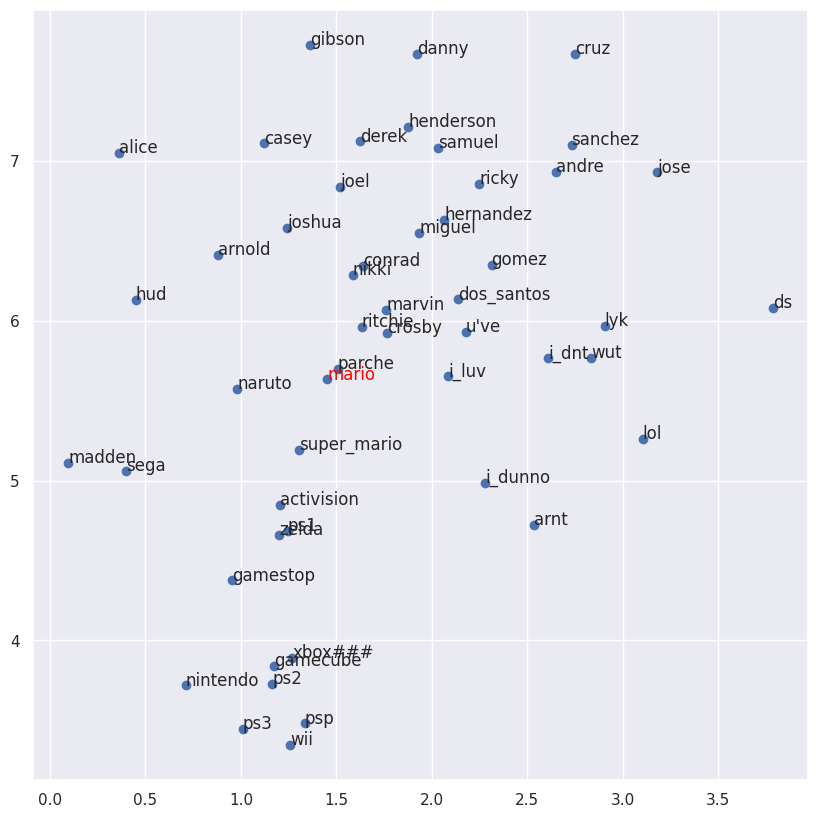

In [117]:
plt.figure(figsize=(10, 10))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, word in enumerate(selected_words):
    if word == target_word:
        plt.annotate(word, (x[i], y[i]), color="red")
    else:
        plt.annotate(word, (x[i], y[i]))